<a href="https://colab.research.google.com/github/ednakatani/Data-Science/blob/marco/DS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`And the year here`

# Import the libs you need

In [ ]:
# Import all packages you need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# etc

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [ ]:
# load your data here
!wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv
!wget https://www.dropbox.com/s/0kzeu3azlpfn2v3/test.csv

--2022-08-16 00:22:56--  https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wxz0qd1ngjb1z2d/train.csv [following]
--2022-08-16 00:22:57--  https://www.dropbox.com/s/raw/wxz0qd1ngjb1z2d/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc762a54843ca108cca96ee8aee0.dl.dropboxusercontent.com/cd/0/inline/BrHDDUZBr-a71YAYe1qJd7GtwDAxTIT1bMCef9fqaPv9jhO6ZS4gQiD7oOt8ccG4UVnNxk7ezmi7_3aiZYuylJtd1XpJECniEdYuFLUyGdb6wp3fCu6XDqqGXAGkTUxzEccNIpQvkXgJi3KfvxqPGs_kUrbCX8t9Y8ckfb0v8jymaQ/file# [following]
--2022-08-16 00:22:57--  https://uc762a54843ca108cca96ee8aee0.dl.dropboxusercontent.com/cd/0/inline/BrHDDUZBr-a71YAYe1qJd7GtwDAxTIT1bMCef9fqaPv9jhO6ZS4gQiD7oOt8ccG4UVnNxk7ezmi7

In [ ]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.columns

Index(['HS_CPF', 'TEMPOCPF', 'DISTCENTROCIDADE', 'ORIENTACAO_SEXUAL',
       'RELIGIAO', 'DISTZONARISCO', 'QTDENDERECO', 'QTDEMAIL', 'QTDCELULAR',
       'CELULARPROCON', 'QTDFONEFIXO', 'TELFIXOPROCON', 'INDICEEMPREGO',
       'PORTEEMPREGADOR', 'SOCIOEMPRESA', 'FUNCIONARIOPUBLICO', 'SEGMENTACAO',
       'SEGMENTACAOCOBRANCA', 'SEGMENTACAOECOM', 'SEGMENTACAOFIN',
       'SEGMENTACAOTELECOM', 'QTDPESSOASCASA', 'MENORRENDACASA',
       'MAIORRENDACASA', 'SOMARENDACASA', 'MEDIARENDACASA', 'MAIORIDADECASA',
       'MENORIDADECASA', 'MEDIAIDADECASA', 'INDICMENORDEIDADE',
       'COBRANCABAIXOCASA', 'COBRANCAMEDIOCASA', 'COBRANCAALTACASA',
       'SEGMENTACAOFINBAIXACASA', 'SEGMENTACAOFINMEDIACASA',
       'SEGMENTACAOALTACASA', 'BOLSAFAMILIACASA', 'FUNCIONARIOPUBLICOCASA',
       'IDADEMEDIACEP', 'PERCENTMASCCEP', 'PERCENTFEMCEP',
       'PERCENTANALFABETOCEP', 'PERCENTPRIMARIOCEP', 'PERCENTFUNDAMENTALCEP',
       'PERCENTMEDIOCEP', 'PERCENTSUPERIORCEP', 'PERCENTMESTRADOCEP',
       'PERCEN

In [ ]:
# clean and treat the data here
remove = ['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO']
df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)
df_train.replace(-9999, np.nan, inplace=True)
df_test.replace(-9999, np.nan, inplace=True)
df_train.replace(-9998, np.nan, inplace=True)
df_test.replace(-9998, np.nan, inplace=True)

In [ ]:
df_train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
0,11.0,3338.0,166753.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
1,19.0,5792.0,4820.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0
2,26.0,1550.0,502.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0,...,4.0,2.0,0.0,0.0,0.0,0.0,NaN,4.0,NaN,0.0
3,18.0,0.0,535010.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,7.0,0.0,1.0,0.0,0.0,NaN,2.0,7.0,0.0
4,20.0,0.0,2528.0,3.0,0.0,1.0,0.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,15.0,0.0


In [ ]:
df_test.head(5)

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR
0,10.0,0.0,9741.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,900.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,26.0,0.0,139139.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2100.0,4.0,10.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN
2,4.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,5.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,3.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
# use as many code and text cells as you wish

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [ ]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


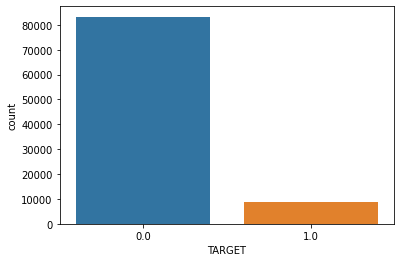

In [ ]:
sns.countplot(df_train['TARGET'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


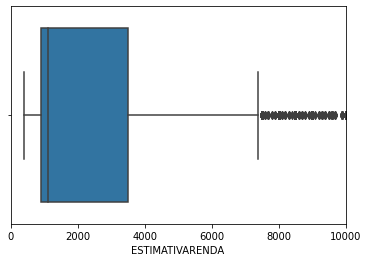

In [ ]:
sns.boxplot(df_train['ESTIMATIVARENDA'])
plt.xlim(0,10000)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


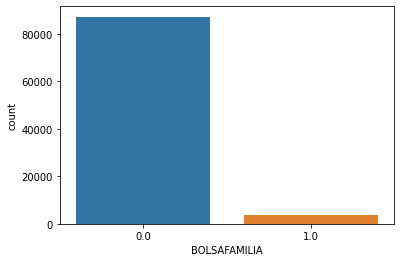

In [ ]:
sns.countplot(df_train['BOLSAFAMILIA'])
#plt.pie(df_train['BOLSAFAMILIA'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


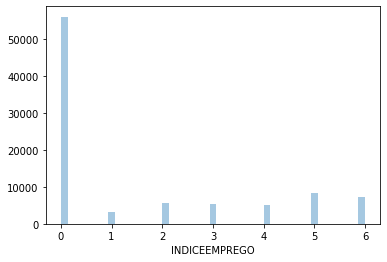

In [ ]:
#df_train['INDICEEMPREGO'].describe()
sns.distplot( df_train["INDICEEMPREGO"], hist=True, kde=False, rug=False )

In [ ]:
# PORTEEMPREGADOR
df_train['PORTEEMPREGADOR'].unique()

array([ 0.,  2.,  1.,  3.,  4., nan])

In [ ]:
# if you realize you need to further clean your data here, there is no problem, 
# yet, make sure you are describing the entire process and the rationale 
# behind your choices here

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [ ]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [ ]:
# your code goes here

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.